<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       999 non-null    int64  
 1   Indicator ID    999 non-null    int64  
 2   Name            999 non-null    object 
 3   Measure         999 non-null    object 
 4   Measure Info    999 non-null    object 
 5   Geo Type Name   999 non-null    object 
 6   Geo Join ID     999 non-null    int64  
 7   Geo Place Name  999 non-null    object 
 8   Time Period     999 non-null    object 
 9   Start_Date      999 non-null    object 
 10  Data Value      999 non-null    float64
dtypes: float64(1), int64(3), object(7)
memory usage: 86.0+ KB
None
            Unique ID  Indicator ID                    Name Measure  \
count      999.000000    999.000000                     999     999   
unique            NaN           NaN                       7       6   
top               NaN        

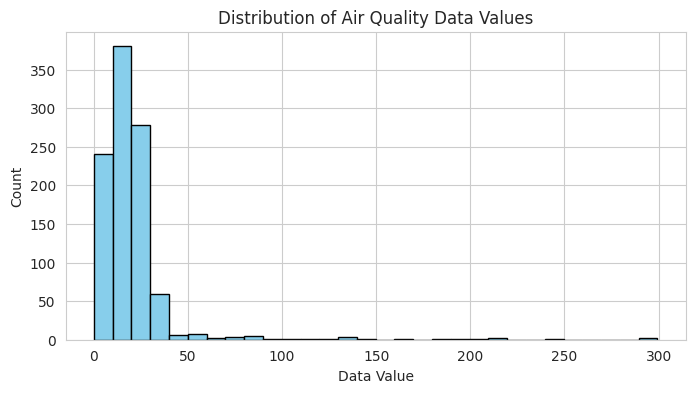

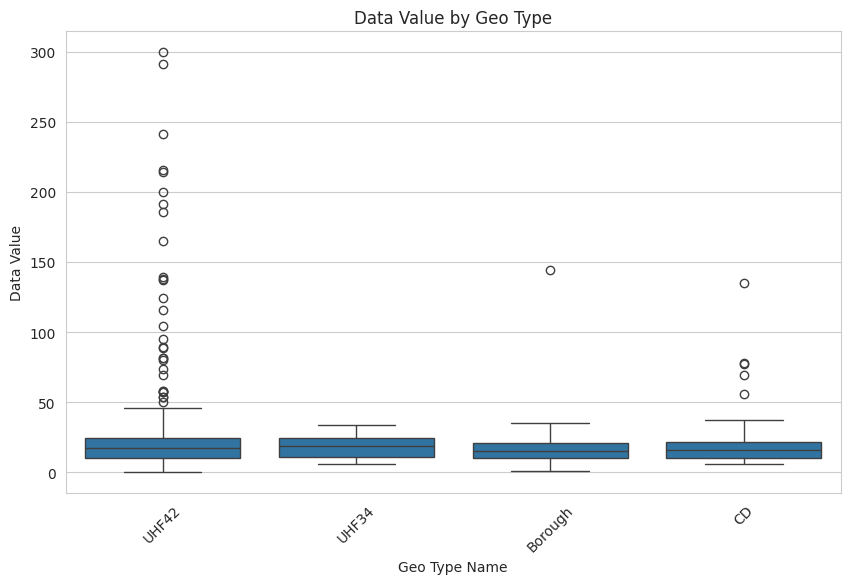

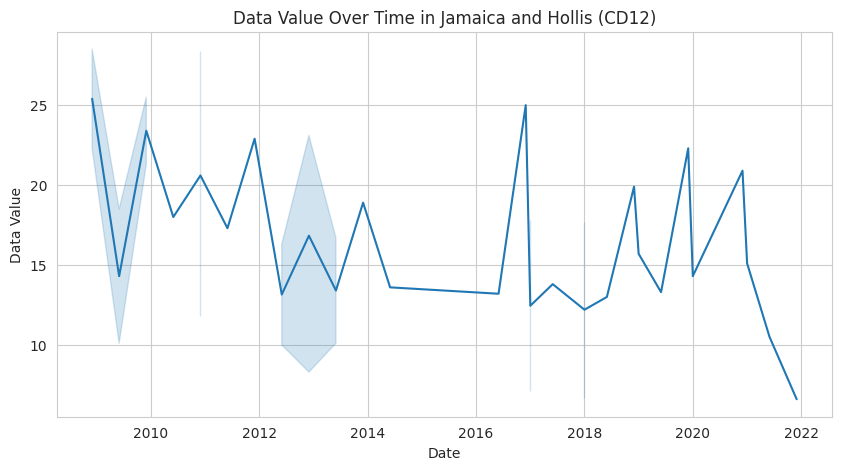

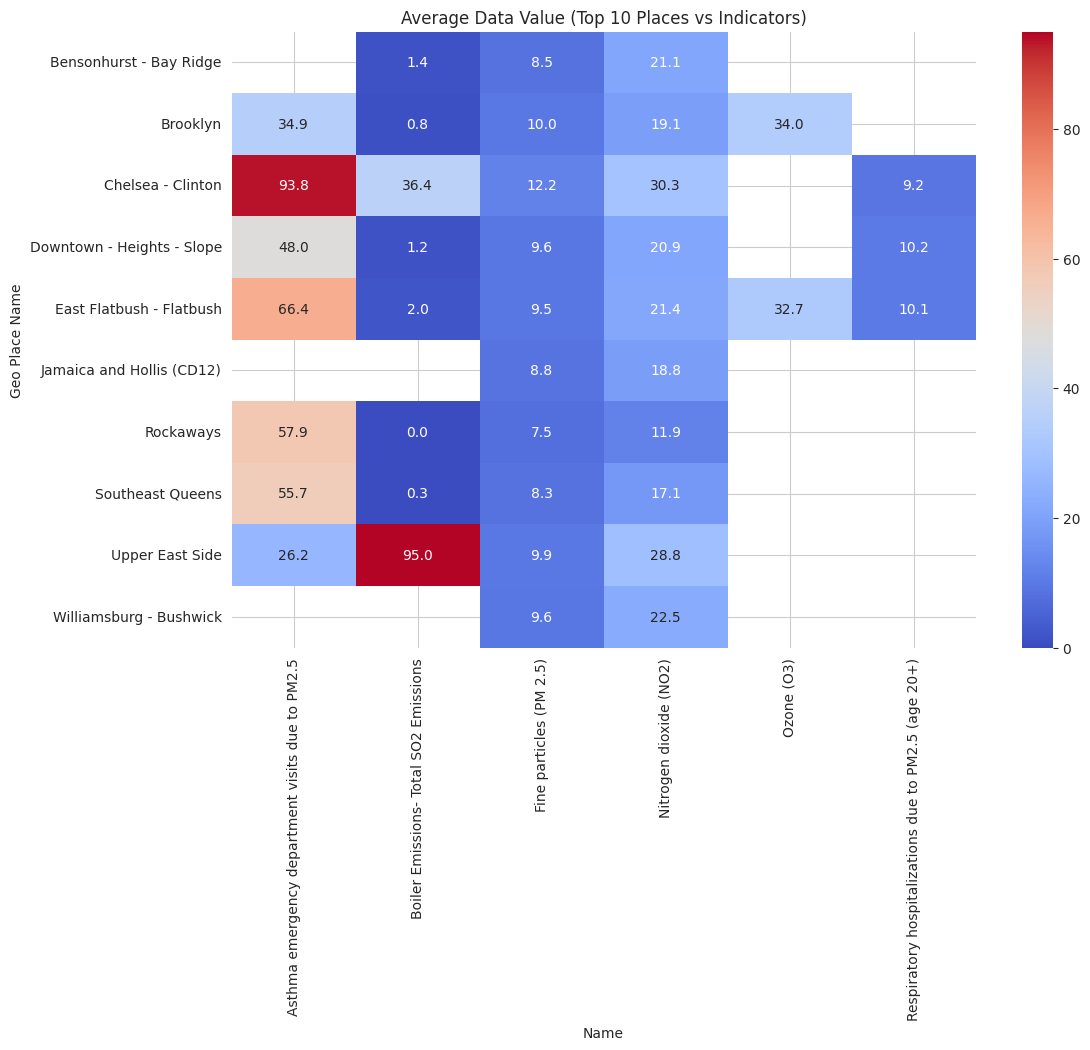

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/content/Air_Quality_dataset_v2.csv')

# 2. Quick info
print(df.info())
print(df.describe(include='all'))
print('Missing values per column:\n', df.isna().sum())

# 3. Clean dates
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

# 4. Basic statistics
print("Average Data Value:", df['Data Value'].mean())
print("Standard Deviation:", df['Data Value'].std())
print("Percentiles (25, 50, 75):", np.percentile(df['Data Value'].dropna(), [25, 50, 75]))

# 5. Top indicators and locations
print("Top 5 Indicators:\n", df['Name'].value_counts().head())
print("Top 5 Places:\n", df['Geo Place Name'].value_counts().head())

# 6. Group analysis
# a) Average Data Value per Indicator
indicator_avg = df.groupby('Name')['Data Value'].mean().sort_values(ascending=False)
print("Average Data Value by Indicator:\n", indicator_avg)

# b) Average Data Value per Place
place_avg = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False)
print("Top 5 places by avg Data Value:\n", place_avg.head())

# 7. Visualizations
sns.set_style('whitegrid')

# 7a. Histogram of Data Values
plt.figure(figsize=(8,4))
plt.hist(df['Data Value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Air Quality Data Values')
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.show()

# 7b. Boxplot of Data Values by Geo Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Geo Type Name', y='Data Value', data=df)
plt.title('Data Value by Geo Type')
plt.xticks(rotation=45)
plt.show()

# 7c. Lineplot of Data Values over Time (for top 1 place)
top_place = df['Geo Place Name'].value_counts().idxmax()
df_top_place = df[df['Geo Place Name'] == top_place]

plt.figure(figsize=(10,5))
sns.lineplot(x='Start_Date', y='Data Value', data=df_top_place)
plt.title(f'Data Value Over Time in {top_place}')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.show()

# 7d. Heatmap of average Data Value per Place and Indicator (top 10 each)
top_places = df['Geo Place Name'].value_counts().nlargest(10).index
top_indicators = df['Name'].value_counts().nlargest(10).index
heatmap_data = df[df['Geo Place Name'].isin(top_places) & df['Name'].isin(top_indicators)]

pivot = heatmap_data.pivot_table(values='Data Value', index='Geo Place Name', columns='Name', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Data Value (Top 10 Places vs Indicators)')
plt.show()

# 8. Suggestions for deeper analysis:
#    - Time series decomposition per place
#    - Predictive modeling (forecast future Data Values)
#    - Anomaly detection on extreme air quality readings
